# Project Name: A/B Testing for Shoefly.com
# By: Ahmed Samir
***

# Introduction

The company analyzed here in this project is an online shoe store called ShoeFly.com. Currently, the company has two different versions of an ad. They have placed the ads in emails as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week. We will analyze the data using aggregate measures. 

## Project Goals
* Analyze the data from an A/B test with Python
* Some questions that will be answered are the following:

    1. How many views came from each utm_source?
    1. Was there a difference in click rates for each source?
    1. Were approximately the same number of people shown both ads?
    1. Product manager for the A/B test thinks that the clicks might have changed by day of the week.
    1. Do you recommend that your company use Ad A or Ad B?

# Data

Shoefly has provided the data as a csv file, *ad_clicks*, with the following attributes:
* *user_id* - the user_id of the customer
* *utm_source* - the locationn where the ad was placed
* *day* - what day of the week the ad was viewed by the customer
* *ad_click_timestamp* - a timestamp for when the ad was clicked and note that NaN values if the ad was not clicked
* *experimental_group* - which ad, A or B, the customer was shown

# Import Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for calculations
import seaborn as sns # for creating visualizations
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


# Load data

In [2]:
# Fill in the line below: Specify the path of the CSV file to read
my_filepath = "/kaggle/input/shoeflycom-ad-clicks-dataset/ShoeFly.com.xlsx"
ad_clicks=pd.read_excel(my_filepath,index_col=0)

In [3]:
# To preview the dataframe to see what data we are working with
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18:00,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


In [4]:
print('We have', ad_clicks.shape[0], 'users in our dataset')

We have 1654 users in our dataset


# Data analysis

Before we perform any analysis on our data, we need to check that experimental groups are equally spliteted in our dataset. 

In [5]:
ad_clicks.experimental_group.value_counts()

A    827
B    827
Name: experimental_group, dtype: int64

# Great! Let's turn into our analysis.

# Q: How many views came from each utm_source?


In [6]:
ad_clicks.groupby('utm_source')['user_id'].count().reset_index().sort_values(by='user_id',ascending=False)

,utm_source,user_id
2,google,680
1,facebook,504
0,email,255
3,twitter,215


# The most of ad views came from *google* & *facebook* utm sorces.

In [7]:
ad_clicks.columns

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group'],
      dtype='object')

We should note that not all the views by the users led to **ad click**. So we have to filter our dataset so that including just ad clicks that occured in a specific timestamp having a **True** value.
This can be done by creating a column called ( **is click** ).

In [8]:
ad_clicks['is_click']=ad_clicks.ad_click_timestamp.apply(lambda x:'True' if pd.notnull(x) else 'False')
ad_clicks.sample(3)

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
858,86063d6c-5c7d-4b2f-a588-6a56d93edf35,facebook,6 - Saturday,NaN,A,False
1553,f195df65-ed6d-4e48-8bca-5748ac2a6bb4,google,7 - Sunday,NaN,B,False
720,70c37cc3-53a4-4383-9821-c8c504c9ba12,twitter,5 - Friday,16:15:00,A,True


In [9]:
source_ad_clicks=ad_clicks.groupby(['utm_source','is_click'])['user_id'].count().reset_index()
source_ad_clicks

,utm_source,is_click,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


We can perform a pivot function for more easily readability.

In [10]:
source_ad_clicks_pivot=source_ad_clicks.pivot(index='utm_source',columns=['is_click'],values='user_id')
source_ad_clicks_pivot

is_click,False,True
utm_source,,
email,175,80
facebook,324,180
google,441,239
twitter,149,66


# Q: Was there a difference in click rates for each source?
We want to know the percent of people who clicked on ads from each utm_source. So Let's create a column ( **percent_clicked %** ) for ad clicks rates of each sourse.

In [12]:
source_ad_clicks_pivot['percent_clicked %'] =round((source_ad_clicks_pivot["True"] / \
   (source_ad_clicks_pivot["True"] + 
    source_ad_clicks_pivot["False"]))\
    *100,2)
    
source_ad_clicks_pivot.sort_values(by='percent_clicked %',ascending=False)

is_click,False,True,percent_clicked %
utm_source,,,
facebook,324,180,35.71
google,441,239,35.15
email,175,80,31.37
twitter,149,66,30.70


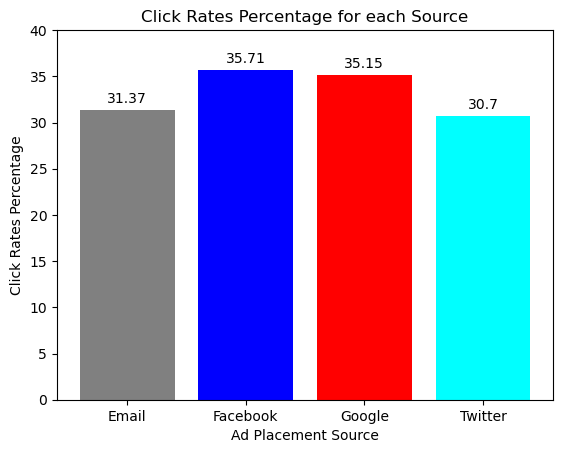

In [13]:
# Visualize the results

# Dataset
utm_source = range(len(source_ad_clicks_pivot))
clicks_percent = source_ad_clicks_pivot['percent_clicked %'].values

# Plot
ax = plt.subplot()
cbs = plt.bar(utm_source,clicks_percent,color=['gray','blue','red','cyan'])
ax.set_title('Click Rates Percentage for each Source')
ax.set_xlabel('Ad Placement Source')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(utm_source,labels = ['Email', 'Facebook','Google','Twitter'])
plt.ylim(0, 40)

# Label the graph with the percentages
for p in cbs:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

* The first part pf this project was done as we found that there was a difference in click rates for each source so that Facebook ads had the highest percentage at 35.71% closely followed by Google ads at 35.15%. The lowest performing ads clicked were from Twitter.
* So we would recommend the company to place its ad on Facebook and Google.

### But which ad version (A or B) would be better to be placed? And which day of week preferred to be placed on?
This is what we will analyze in the second part.

# Q: What are ad clicks rates of each version ( A & B )?
Here, we need to perform an A/B analysis of the two versions of the ad related to the number of ad clicks.

In [14]:
ad_clicks.columns

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group', 'is_click'],
      dtype='object')

In [15]:
ad_version_clicks=ad_clicks.groupby(['experimental_group','is_click'])['user_id'].count().reset_index()

ad_version_clicks_pivot=ad_version_clicks.pivot(index='experimental_group',columns=['is_click'],values='user_id')
ad_version_clicks_pivot

is_click,False,True
experimental_group,,
A,517,310
B,572,255


We want to know the percent of people who clicked on ads from each ad version. So Let's create a column ( percent_clicked % ) for ad clicks rates of each ad version.

In [16]:
ad_version_clicks_pivot['percent_clicked %'] =round((ad_version_clicks_pivot["True"] / \
   (ad_version_clicks_pivot["True"] + 
    ad_version_clicks_pivot["False"]))\
    *100,2)
    
ad_version_clicks_pivot.sort_values(by='percent_clicked %',ascending=False)

is_click,False,True,percent_clicked %
experimental_group,,,
A,517,310,37.48
B,572,255,30.83


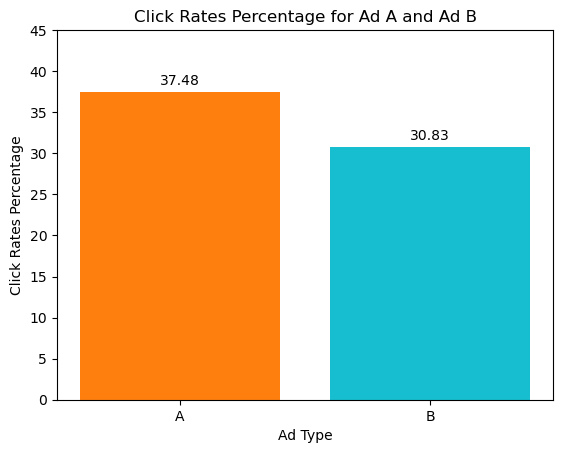

In [18]:
# Dataset
exp = range(len(ad_version_clicks_pivot))
p_clicked = ad_version_clicks_pivot['percent_clicked %'].values

# Plot
ax = plt.subplot()
cbs = plt.bar(exp,p_clicked,color=['tab:orange','tab:cyan'])
ax.set_title('Click Rates Percentage for Ad A and Ad B')
ax.set_xlabel('Ad Type')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(exp,labels = ['A', 'B'])
plt.ylim(0, 45)

# Label the graph with the percentages
for p in cbs:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

#### A user who was given Ad A was more likely to click the ad at 37.48% than a user who was given Ad B.

# Q: Which day of week would be preferrred to place the ad on?

In [27]:
ad_clicks.columns

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group', 'is_click'],
      dtype='object')

In [28]:
most_dayweek_clicks_rates=ad_clicks.groupby(['experimental_group','day','is_click'])['user_id'].count().reset_index()

most_dayweek_clicks_rates_pivot=most_dayweek_clicks_rates.pivot(index=['experimental_group','day'],columns=['is_click'],values='user_id')

most_dayweek_clicks_rates_pivot['percent_clicked %'] =round((most_dayweek_clicks_rates_pivot["True"] / \
   (most_dayweek_clicks_rates_pivot["True"] + 
    most_dayweek_clicks_rates_pivot["False"]))\
    *100,2)
    
most_dayweek_clicks_rates_pivot.sort_values(by='percent_clicked %',ascending=False)


is_click                          False  True  percent_clicked %
experimental_group day                                          
A                  4 - Thursday      69    47              40.52
                   5 - Friday        77    51              39.84
                   7 - Sunday        66    43              39.45
                   6 - Saturday      73    45              38.14
                   1 - Monday        70    43              38.05
B                  2 - Tuesday       74    45              37.82
A                  2 - Tuesday       76    43              36.13
B                  6 - Saturday      76    42              35.59
                   7 - Sunday        75    34              31.19
A                  3 - Wednesday     86    38              30.65
B                  5 - Friday        90    38              29.69
                   1 - Monday        81    32              28.32
                   3 - Wednesday     89    35              28.23
                   4 - Thursday      87    29              25.00

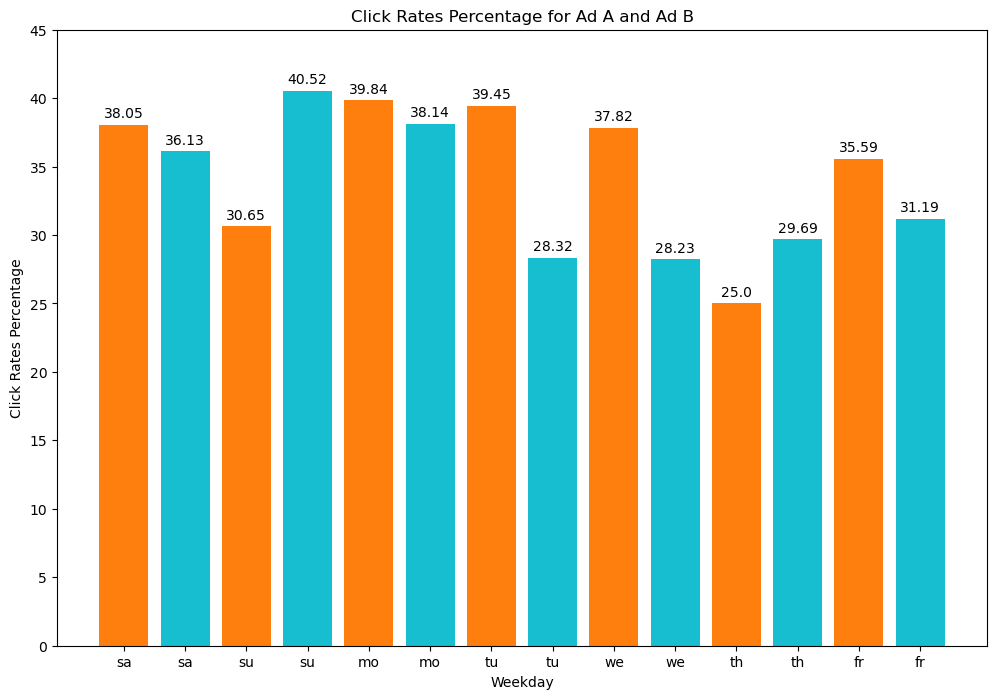

In [35]:
# Dataset
day_week = range(len(most_dayweek_clicks_rates_pivot))
day_clicked = most_dayweek_clicks_rates_pivot['percent_clicked %'].values

# Plot
plt.figure(figsize=(12,8))
ax = plt.subplot()
cbs = plt.bar(day_week,day_clicked,color=['tab:orange','tab:cyan'])
ax.set_title('Click Rates Percentage for Ad A and Ad B')
ax.set_xlabel('Weekday')
ax.set_ylabel('Click Rates Percentage')
ax.set_xticks(day_week,labels = ['sa','sa', 'su','su','mo','mo','tu','tu','we','we','th','th','fr','fr'])
plt.ylim(0, 45)

# Label the graph with the percentages
for p in cbs:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

During the days of the week, the performance of Ad A outpaced that of Ad B. Ad B, in particular, only performed better than Ad A on **Tuesday**.

# Conclusion
* To ensure that the sample is fair, we learned that the company conducted the A/B test with the same amount of participants for the two different ads.
* Furthtermore, we learned the amount of views per source and the percentage of those that clicked the ad. We found that there was a difference in click rates for each source with Facebook ads having 35.71% clicked rate closely followed by Google ads at 35.15%. This could be explained with the possiblity that these two platforms have a higher number of active users as the amount of users that viewed the ads from these two platforms acounted for 71.58% of the sampled data.
* We also analyzed if the day of the week affected the click rate to answer the product manager's hypothesis. To summarize the results, we learned that Ad A performed better than Ad B regardless of the day of the week the ad was shown. 

## Therefore, I would recommend that the company run Ad A instead of Ad B and allocate more resources into running the ad on Facebook and Google than the other platforms to maximize user traffic into ShoeFly.com.

# Done!